In [10]:
import yfinance as yf

symbol = "603259.SS"
stock = yf.Ticker(symbol)
data = stock.history(period="max")
close = data["Close"].values.reshape(-1, 1)
close

array([[12.52526283],
       [13.77778625],
       [15.15516472],
       ...,
       [38.70000076],
       [37.59999847],
       [37.59999847]])

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
close = scaler.fit_transform(close)
close

array([[0.        ],
       [0.00843764],
       [0.01771636],
       ...,
       [0.17632637],
       [0.16891619],
       [0.16891619]])

In [13]:
import numpy as np

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [14]:
train_size = int(len(close) * 0.8)
train, test = close[0:train_size,:], close[train_size:len(close),:]
test

array([[0.45919945],
       [0.45355608],
       [0.47463748],
       [0.4721726 ],
       [0.471005  ],
       [0.43986941],
       [0.43039896],
       [0.42242043],
       [0.41126355],
       [0.40211747],
       [0.35346804],
       [0.35885192],
       [0.35100316],
       [0.35366262],
       [0.35191127],
       [0.34678688],
       [0.35489514],
       [0.34691655],
       [0.34763008],
       [0.35534916],
       [0.3451652 ],
       [0.36339251],
       [0.36216004],
       [0.35541408],
       [0.34905717],
       [0.35152205],
       [0.35930595],
       [0.36436553],
       [0.3619006 ],
       [0.35554375],
       [0.34386785],
       [0.34886259],
       [0.34698147],
       [0.33725158],
       [0.35087339],
       [0.35567347],
       [0.34432193],
       [0.33368394],
       [0.32609465],
       [0.3314785 ],
       [0.35307887],
       [0.35483022],
       [0.36196546],
       [0.36027429],
       [0.38156703],
       [0.38754741],
       [0.37433805],
       [0.368

In [19]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
testX.shape
testY.shape

(298,)

In [21]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

2024-07-07 11:33:24.664390: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/100


/Users/haotao.chen/Desktop/github/repositories/python/stock/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1194/1194 - 3s - 3ms/step - loss: 0.0316
Epoch 2/100
1194/1194 - 1s - 1ms/step - loss: 0.0013
Epoch 3/100
1194/1194 - 1s - 1ms/step - loss: 3.5716e-04
Epoch 4/100
1194/1194 - 2s - 2ms/step - loss: 3.5016e-04
Epoch 5/100
1194/1194 - 3s - 2ms/step - loss: 3.4391e-04
Epoch 6/100
1194/1194 - 1s - 1ms/step - loss: 3.4673e-04
Epoch 7/100
1194/1194 - 1s - 1ms/step - loss: 3.4638e-04
Epoch 8/100
1194/1194 - 1s - 1ms/step - loss: 3.5693e-04
Epoch 9/100
1194/1194 - 1s - 1ms/step - loss: 3.4646e-04
Epoch 10/100
1194/1194 - 1s - 1ms/step - loss: 3.4750e-04
Epoch 11/100
1194/1194 - 1s - 1ms/step - loss: 3.5674e-04
Epoch 12/100
1194/1194 - 2s - 1ms/step - loss: 3.5950e-04
Epoch 13/100
1194/1194 - 2s - 1ms/step - loss: 3.4478e-04
Epoch 14/100
1194/1194 - 1s - 1ms/step - loss: 3.5127e-04
Epoch 15/100
1194/1194 - 1s - 1ms/step - loss: 3.4233e-04
Epoch 16/100
1194/1194 - 1s - 1ms/step - loss: 3.5187e-04
Epoch 17/100
1194/1194 - 1s - 1ms/step - loss: 3.4884e-04
Epoch 18/100
1194/1194 - 1s - 1ms/step - lo

Matplotlib is building the font cache; this may take a moment.


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


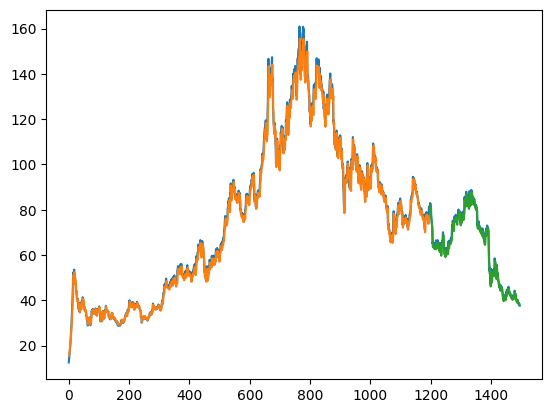

In [24]:
import matplotlib.pyplot as plt

trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# shift train predictions for plotting
trainPredictPlot = np.empty_like(close)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(close)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(close)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(close))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()